In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving World Population Live Dataset.csv to World Population Live Dataset.csv


The purpose of this notebook is to use KMeans factorization to find patterns across the countries of the world




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("World Population Live Dataset.csv")

In [7]:
df.head(20)

,CCA3,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
0,CN,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,17.88%,1
1,IN,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,17.77%,2
2,US,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,4.24%,3
3,ID,Indonesia,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,3.45%,4
4,PK,Pakistan,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,2.96%,5
5,NG,Nigeria,218541,208327,183996,160953,122852,95214,72951,55569,923768,236.5759,1.02,2.74%,6
6,BR,Brazil,215313,213196,205188,196353,175874,150706,122288,96370,8515767,25.2841,1.00,2.70%,7
7,BD,Bangladesh,171186,167421,157830,148391,129193,107148,83930,67542,147570,1160.0350,1.01,2.15%,8
8,RU,Russia,144713,145617,144668,143243,146845,148006,138257,130093,17098242,8.4636,1.00,1.81%,9
9,MX,Mexico,127504,125998,120150,112532,97873,81720,67705,50289,1964375,64.9082,1.01,1.60%,10


In [20]:
df['World Population Percentage'] = df['World Population Percentage'].str.strip('%').astype('float')

<Figure size 1440x1296 with 0 Axes>

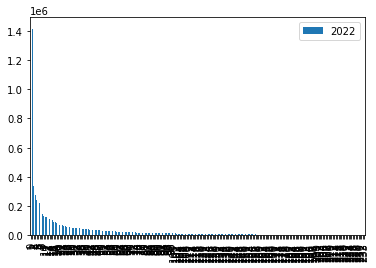

In [12]:
plt.figure(figsize=(20,18))
df[["Name","2022"]].plot(kind='bar')
plt.show()

In [13]:
from sklearn.cluster import KMeans

In [14]:
km = KMeans(n_clusters=5)

In [21]:
km.fit(df.drop('CCA3',axis=1).drop('Name',axis=1).values)

KMeans(n_clusters=5)

In [22]:
km.labels_

array([1, 4, 1, 4, 0, 0, 1, 3, 2, 4, 3, 0, 3, 0, 4, 3, 4, 0, 3, 0, 3, 0,
       0, 0, 3, 0, 0, 0, 3, 0, 3, 4, 4, 4, 3, 0, 3, 0, 1, 3, 4, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 1, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 4,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [23]:
print(km.inertia_)

29574431071961.332


In [27]:
inertias = [KMeans(n_clusters=k).fit(df.drop('CCA3',axis=1).drop('Name',axis=1).values).inertia_ for k in range(1,10)]

Text(0.5, 1.0, 'Inertia per # Cluster')

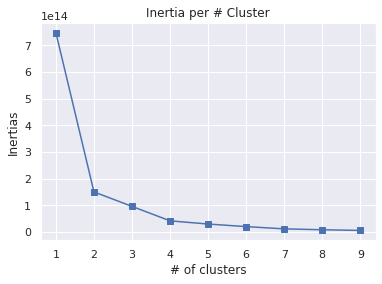

In [34]:
sns.set_theme()
plt.plot(range(1,10),inertias,marker='s')
plt.xlabel('# of clusters')
plt.ylabel('Inertias')
plt.title('Inertia per # Cluster')

It seems that a number of cluster 4 it´s a good choice because for the next # of clusters the slope is close to 0

In [37]:
labels = KMeans(n_clusters=4).fit(df.drop('CCA3',axis=1).drop('Name',axis=1)).labels_

In [51]:
labels = pd.Series(labels,name='Label')

In [52]:
res = pd.concat([df.Name, labels],axis=1,)

In [59]:
res[res.Label==1]

,Name,Label
0,China,1
2,United States,1
6,Brazil,1
38,Canada,1
54,Australia,1


All these countries are very big, maybe the clustering labels are according to size

In [63]:
res[res.Label==0].head(40)

,Name,Label
7,Bangladesh,0
10,Japan,0
12,Philippines,0
15,Vietnam,0
17,Turkey,0
18,Germany,0
19,Thailand,0
20,United Kingdom,0
22,France,0
24,Italy,0


All these countries are medium to city-size, so it seems plausible that the clustering is size related

In [64]:
res[res.Label==3].head(40)

,Name,Label
8,Russia,3


Russia being the largest country in the world, is in his proper category

So if we order the labels according to their respective size category we have 

In [72]:
dfl = pd.DataFrame(np.array([3,1,2,0]),columns=['Label_ordered_by_size'])

In [73]:
dfl

,Label_ordered_by_size
0,3
1,1
2,2
3,0
